In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baseline Python
This notebook is intended to make a quick scan of different skills. It will test:

- knowledge about mathematical notation (function definitions, sets) and a minimum of linear algebra (matrix multiplication)
- numpy (generating data, concatenating, dotproduct)
- generate a pandas dataframe, basic plotting
- creating a class
- basic efficiency (avoiding forloops with vectorization)
- list comprehensions

Don't worry if you get stuck: this notebook is meant to identify the subjects where you will need more explanation.

## Excercise 1
### definition 1
>Let there be $m$ observations $x_i \in X$ with $i=\{1, ..., m\}$ where every observation has $n$ features: $x_i=\{x_{i,1}, ..., x_{i,n}\}$ 

We will represent these as a matrix $X$ with dimensions $(m, n)$ such that value $x_{i,j}$ is the $i^{th}$ observation for feature $j$.

### objective

Use numpy to create a matrix $X$ with $m=100, n=2$, filled with random floating point numbers. This will be our set of 100 observations with 2 features.

<details>
  <summary>HINT: Click to expand!</summary>

  You can use `np.random.rand`
  If you are not familiar, you can access the documentation directly from the jupyter notebook, by running either
  `help(np.random.rand)` or `?np.random.rand`
  
</details>

In [3]:
X = np.random.rand(100,2)

## Excercise 2

### definition 2
>We want to implement a function $f: \mathbb{R}^m \to \mathbb{R}$ such that $$f(x) = wx + b$$
>Here, $w$ are weights $w=\{w_1, ..., w_n\}$ where $n$ corresponds to the number of features and $b$ is an extra bias weight. We will initialize $w$ at random.


**Example** if we observe a person $x_1$, as features let us measure someones height and shoe-size. Let us obtain $x_1=\{1.84, 46\}$.
Now, let our randomly initialized weights $w$ be $\{0.9, 0.2\}$ and our $b=3$. With this, we would need to calculate: $0.9 * 1.84 + 0.2 * 46 + 3$ for that person.
For a next person let us obtain $x_2=\{1.65, 36\}$, and thus we would need to calculate $0.9 * 1.65 + 0.2 * 36 + 3$.

### definition 3
To implement this more efficient, we will redefine the function slightly:
>First, we add a dummy observation of 1 to the features: we get $x_i=\{x_{i,1}, ..., x_{i,n}, 1\}$
>Then, we add the bias to the weights, such that we get $w=\{w_1, ..., w_n, b\}$.
>With this, we can change the formula to $$f(x)= wx$$


**Example** our previous example would be $x_1=\{1.84, 46, 1\}$ and $w=\{0.9, 0.2, 3\}$ and we would calculate $0.9 * 1.84 + 0.2 * 46 + 3 * 1$.

### Objective
To implement this , do the following:
- create a columnvector $Xb$ where all entries are equal to 1, with dimensions $(m, 1)$. This will be the weight used for the bias. Do not hardcode $m$, but retrieve it from $X$.
- concatenate the observations $X$ with $Xb$ along the columns, such that you get a matrix with dimensions $(m, n+1)$.
- initialize a columnvector $w$ where you add the bias as one of the weights. So, it should have dimensions $(n+1, 1)$. Do not hardcode $n$, but retrieve it from $X$.
- calculate $f(x)$ for all $m$
- store the result of your calculation, that should have shape $(m, 1)$ in a variable `yhat`, which refers to your prediction $\hat{y}$ 

<details>
  <summary>HINT: Click to expand!</summary>
  
  For this, you can use the following numpy functions:
  `np.ones`, `np.concatenate`, `np.random.rand` and `np.dot`.
</details>

In [4]:
Xb = np.ones((len(X), 1))
X = np.concatenate([X, Xb], axis=1)
W = np.random.rand(X.shape[-1],1)
yhat = np.dot(X, W)

## Excercise 3

### Objective
- concatenate $X$ and your prediction `yhat`
- put them in a pandas dataframe, with column names 'height', 'shoe', 'bias' and 'yhat'.
- make a scatterplot, with on the x-axis 'height', on the y-axis 'shoe', and use 'yhat' as a color.

Make sure you have:
- labels 'height' and 'shoe' on the x and y axis
- a legend for the color
- a title 'prediction'


<details>
  <summary>HINT: Click to expand!</summary>

  For this excercise, you can use `np.concatenate`, `pd.DataFrame`, `sns.scatterplot` and `plt.title`.
  Alternatively, you can completely use matplotlib `plt.scatter` or `plt.plot` for plotting, but getting the colors right will take much more coding then the sns.scatterplot oneliner.
  
</details>



Text(0.5, 1.0, 'prediction')

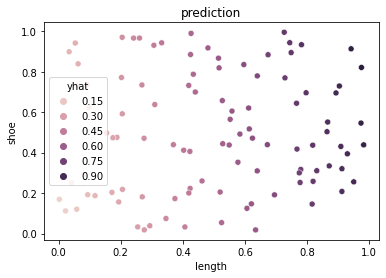

In [6]:
data = np.concatenate([X, yhat], axis=1)
p = pd.DataFrame(data, columns=['length', 'shoe', 'bias', 'yhat'])
sns.scatterplot(data=p, x='length', y='shoe', hue='yhat')
plt.title('prediction')


## Excercise 4

### Objective
Create a class `LinearFunction` with three functions: `__init__`, `generate` and `predict`:

*\_\_init__*
- on initialization you pass variables $m$ and $n$, corresponding to $m$ observations with $n$ features.
- store the original $(m,n)$ dimensions as a tuple in the object
- you call the `generate` function

*generate*
- initialize random data using variables $n$ and $m$, add a column for the bias, 
- generate weights
- store data and weights in the object

*predict*
- you return the result of $f(x)=wx+b$


<details>
  <summary>HINT: Click to expand!</summary>

  This is mainly stitching together the previous lines of code into functions and a class.
  So just reuse what you did before, and make sure everything works inside a function.
  
</details>

In [9]:
class LinearFunction():
    def __init__(self, m : int, n: int):
        self.shape = (m, n)
        self.generate()

    def generate(self):
        X = np.random.rand(self.shape[0],self.shape[1])
        Xb = np.ones((len(X), 1))
        self.X = np.concatenate([X, Xb], axis=1)
        self.W = np.random.rand(self.X.shape[-1],1)
    
    def predict(self):
        return np.dot(self.X, self.W)

## Excercise 5
If you have implemented your formula efficiently, you should be able to scale it up.

In [10]:
%%time
small = LinearFunction(1000, 3)
yhat = small.predict()

CPU times: user 725 µs, sys: 520 µs, total: 1.25 ms
Wall time: 829 µs


The next function should run in seconds. On my laptop ((2.4 GHz Quad-Core Intel i5), I runs in 1.7 seconds.
If it takes much longer, you didnt implement it efficiently and should go back to the implementation.

In [11]:
%%time
big = LinearFunction(100000, 1000)
yhat = big.predict()
len(yhat)

CPU times: user 1.09 s, sys: 437 ms, total: 1.53 s
Wall time: 1.46 s


100000

The code will test this solution for linear growing numbers (factor 10) of observations and features.
The time it takes to compute should not grow with a factor 10, but slower.
If the previous code did not run fast (eg around 2 seconds, but definitely below 10 sec) you should either fix that, or reduce the maximum numbers in the ranges.

In [12]:
nrange = range(2,5)
mrange = range(1,4)
heatmap_vec = np.zeros((len(nrange),len(mrange)))

for i, n in enumerate([10**i for i in nrange]):
    for j, m in enumerate([10**i for i in mrange]):
        func = LinearFunction(n, m)
        looptime = %timeit -o func.predict()
        heatmap_vec[i, j] = looptime.average

1.41 µs ± 37.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.44 µs ± 81.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.89 µs ± 437 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.1 µs ± 728 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
10 µs ± 1.11 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
124 µs ± 8.93 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
24.1 µs ± 1.82 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
171 µs ± 9.47 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.76 ms ± 85.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
sns.heatmap(heatmap_vec, annot=heatmap_vec)

## Excercise 6
Define a variable `threshold=1`.
Create a list comprehension that runs through the yhat, and assigns a value -1 for every value smaller then the threshold, else 1.

In [13]:
threshold = 1

clf = [-1 if x < threshold else 1 for x in yhat]

Make a list comprehension that will select every item in X, if it is larger than
2.

In [26]:
X = [1, 2, 3, 4, 5]
select = [x for x in X if x > 2]
assert select == [3,4,5]


Make a list comprehension that has the same result as this nested forloop:

In [29]:
Z = ["a", "b", "c"]

out = []
for x in X:
    for z in Z:
        out.append(str(x) + z)


In [31]:
out2 = [str(x) + z for x in X for z in Z]
assert out == out2

Make a list comprehension that both unpacks the values in the dictionary AND
inverts the dictionary.

In [39]:
nested_data = {"a" : [1,2,3], 
               "b" : [10, 20, 30]}

new_dict = {}
for k,values in nested_data.items():
    for v in values:
        new_dict[v] = k
new_dict
    

{1: 'a', 2: 'a', 3: 'a', 10: 'b', 20: 'b', 30: 'b'}

In [40]:
new_dict2 = {v:k for k, values in nested_data.items() for v in values}
assert new_dict == new_dict2